## Инициализация центроид KMeans++

## Инициализация центроид KMeans++

### Инициализация случайная

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

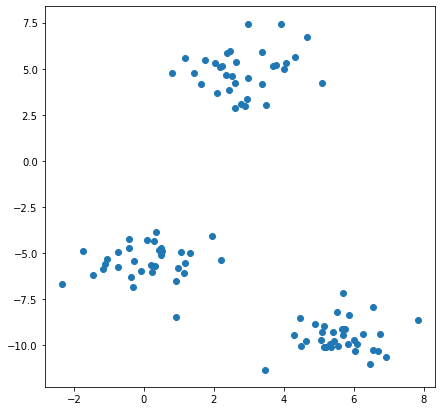

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

Инициализируем центроиды

In [ ]:
k = 3

In [ ]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [ ]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

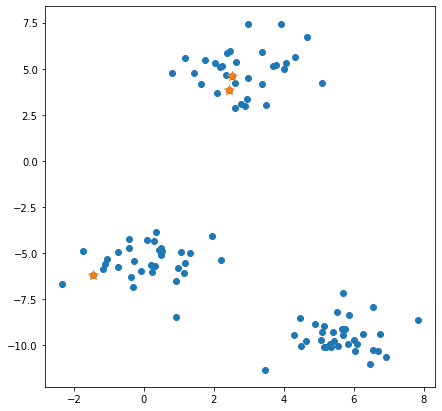

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);

In [ ]:
colors = ['green', 'orange', 'red']

### Функция для обучения KMeans

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

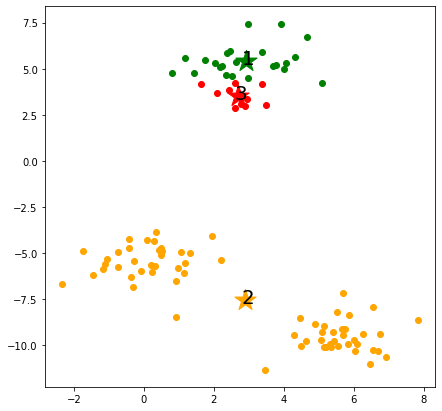

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Инициализация KMeans++ из sklearn

In [ ]:
from sklearn.cluster import kmeans_plusplus

centroids_pp, centroids_ids = kmeans_plusplus(X, n_clusters=3, random_state=0)
centroids_pp, centroids_ids

(array([[ 4.05619693,  5.32231077],
        [ 1.13730861, -6.0760439 ],
        [ 5.99156553, -9.73238127]]), array([44, 64, 46]))

In [ ]:
X[centroids_ids]

array([[ 4.05619693,  5.32231077],
       [ 1.13730861, -6.0760439 ],
       [ 5.99156553, -9.73238127]])

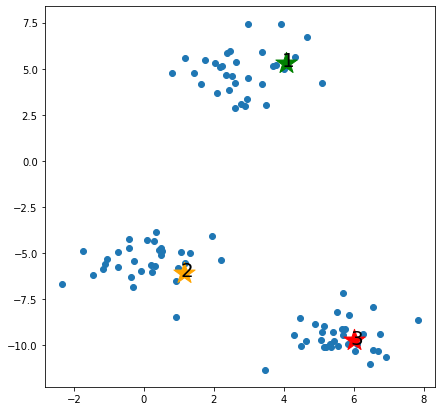

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

for i, centr in enumerate(centroids_pp):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Самостоятельная реализация KMeans++

In [ ]:
def plot_data(X, centroids):
    plt.figure(figsize=(7, 7))

    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], marker='*', label='предыдущие центроиды')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], marker='*', label='следующая центроида', s=200, edgecolors='black')

    plt.legend()
    plt.show()

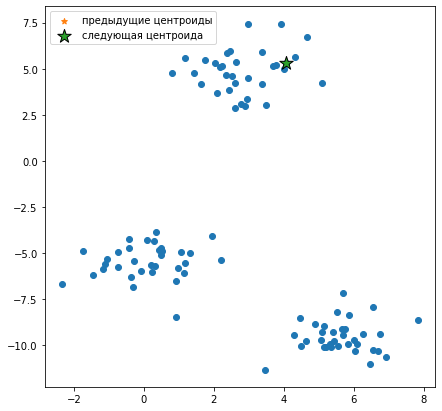

In [ ]:
centroids = []
centroids.append(X[centroids_ids[0]])
plot_data(X, np.array(centroids))

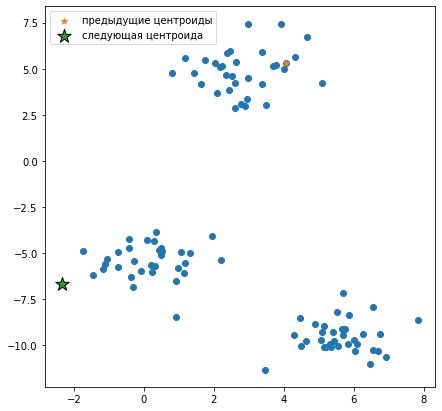

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    obj_ind = distances.argmax()

next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [ ]:
dists = []

for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    dists.append(distances.min())

dists[:10]

[0.0,
 3.3648972729747024,
 2.1863863808352844,
 8.76547114399139,
 2.0234542899343846,
 1.3199796359180924,
 9.11584837953402,
 3.103801452730353,
 0.2936905729075689,
 8.033021812744863]

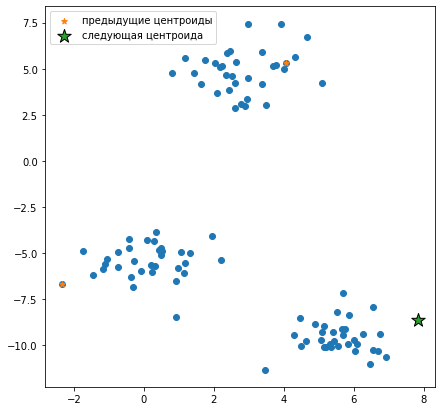

In [ ]:
obj_ind = np.array(dists).argmax()
next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [ ]:
centroids

[array([4.05619693, 5.32231077]),
 array([-2.32496308, -6.6999964 ]),
 array([ 7.82111653, -8.66750208])]

### Функция для инициализации KMeans++

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    plot_data(X, np.array(centroids))


    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

        plot_data(X, np.array(centroids))

    return centroids

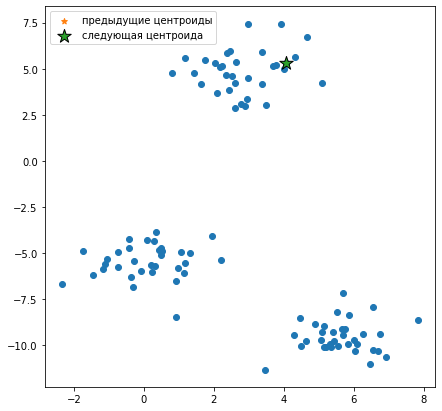

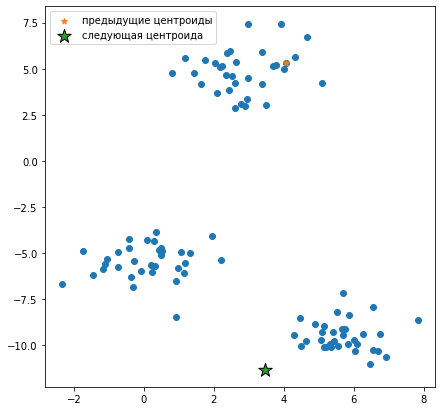

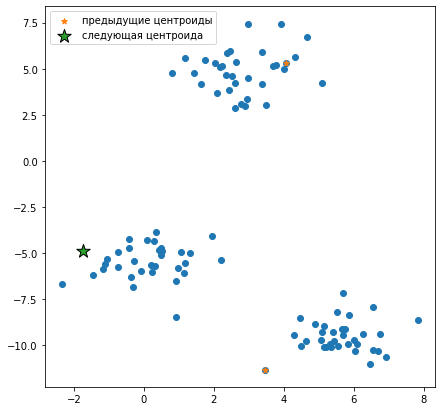

In [ ]:
centroids = kmeanspp(X, k=3)

In [ ]:
centroids

[array([4.05619693, 5.32231077]),
 array([  3.44868458, -11.32833331]),
 array([-1.74093095, -4.89176978])]

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        np.random.seed(seed)
        centroid_ids = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X, centroids=centroids)

stopping at iter 2


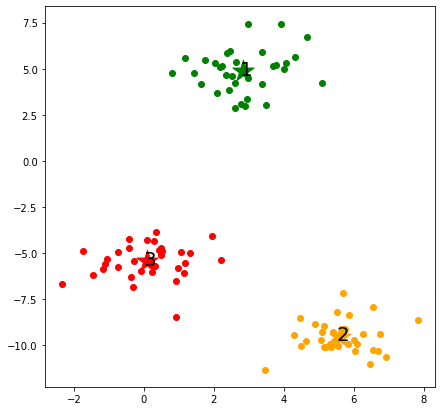

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### KMeans++ из оригинальной [статьи](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)



In [ ]:
centroids = np.empty((k, X.shape[1]))
centroids[0] = X[centroids_ids[0]]
centroids

array([[ 4.05619693,  5.32231077],
       [17.2       , 17.2       ],
       [17.2       , 17.2       ]])


In particular, let D(x) denote the shortest distance from a data point to the closest center we have already chosen.
Then, we define the following algorithm, which we call k-means++.


1.   Take one center c1, chosen uniformly at random from X .
2.   Take a new center ci, choosing x ∈ X with probability $\frac{D(x)^2}{\sum{D(x)^2}}$


In [ ]:
distances = []
for x in X:
    distances.append(np.linalg.norm(centroids[0] - x))

distances = np.array(distances) ** 2
distances[:10]

array([1.85255073e+02, 1.17028201e+02, 4.78028541e+00, 2.35541509e+02,
       4.09436726e+00, 1.74234624e+00, 2.48180576e+02, 1.11651825e+02,
       8.62541526e-02, 1.59485541e+02])

In [ ]:
sum_dist = distances.sum()
sum_dist

12197.31232118332

In [ ]:
np.set_printoptions(suppress=True)

proba = distances / sum_dist
proba

array([0.01518819, 0.00959459, 0.00039191, 0.01931094, 0.00033568,
       0.00014285, 0.02034715, 0.00915381, 0.00000707, 0.01307547,
       0.01968649, 0.00069166, 0.00041755, 0.01038445, 0.01374238,
       0.00001461, 0.01789497, 0.00045935, 0.01924511, 0.00027045,
       0.01658597, 0.007574  , 0.00054152, 0.0093696 , 0.01513936,
       0.00088688, 0.00023699, 0.00001331, 0.00025184, 0.01817432,
       0.01231782, 0.00058455, 0.00015219, 0.0206181 , 0.00992597,
       0.00808472, 0.01091664, 0.00024351, 0.00067556, 0.00056062,
       0.01130857, 0.01566392, 0.01201703, 0.01173662, 0.        ,
       0.01958695, 0.01888854, 0.015806  , 0.01146839, 0.02162249,
       0.00036993, 0.00968658, 0.02276018, 0.01487012, 0.01188317,
       0.01720785, 0.00016832, 0.00993616, 0.01942507, 0.01860178,
       0.00046257, 0.0001821 , 0.01253669, 0.00887408, 0.01135024,
       0.02047694, 0.01735707, 0.00936869, 0.01266685, 0.00885553,
       0.00019006, 0.01833403, 0.00027545, 0.00027569, 0.01113

In [ ]:
proba.argmax()

52

In [ ]:
proba[52]

0.022760179623509538

In [ ]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([90])

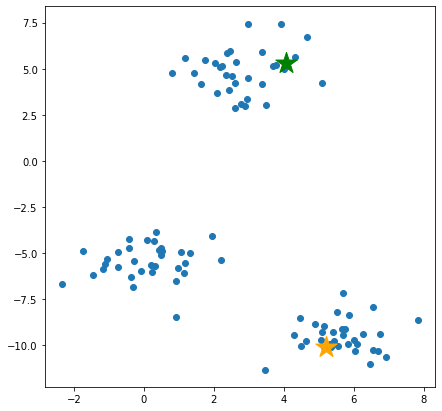

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

In [ ]:
centroids[1] = X[ind]
centroids

array([[  4.05619693,   5.32231077],
       [  5.19423061, -10.08668991],
       [ 17.2       ,  17.2       ]])

Третья центроида

In [ ]:
distances = []
for x in X:
    distances.append(min(np.linalg.norm(centroids - x, axis=1)))

distances = np.array(distances) ** 2
distances[:10]

array([68.00796672, 48.75456642,  4.78028541,  0.42684763,  4.09436726,
        1.74234624,  0.776173  , 65.60890834,  0.08625415,  8.5812706 ])

In [ ]:
sum_dist = distances.sum()
sum_dist

1823.4872426534132

In [ ]:
proba = distances / sum_dist
proba

array([0.03729555, 0.02673699, 0.00262151, 0.00023408, 0.00224535,
       0.0009555 , 0.00042565, 0.03597991, 0.0000473 , 0.00470597,
       0.00000192, 0.0046265 , 0.00279298, 0.02003478, 0.0223576 ,
       0.00009776, 0.00067101, 0.00307259, 0.00001856, 0.00180902,
       0.00085469, 0.02569119, 0.00362224, 0.02238459, 0.00203935,
       0.00593237, 0.00158522, 0.00008901, 0.00168454, 0.00034008,
       0.01698298, 0.00391003, 0.00101799, 0.00124438, 0.03316263,
       0.03394056, 0.01983762, 0.00162881, 0.00451884, 0.00374997,
       0.04117586, 0.00183644, 0.03269853, 0.0225107 , 0.        ,
       0.00007338, 0.00041748, 0.00157831, 0.03375088, 0.00179946,
       0.00247447, 0.01704558, 0.00251639, 0.0036009 , 0.02446983,
       0.00488878, 0.00112588, 0.02587631, 0.00044923, 0.00008843,
       0.0030941 , 0.00121807, 0.03173898, 0.03256851, 0.01784707,
       0.00103685, 0.00060812, 0.02762326, 0.02481828, 0.03105041,
       0.00127133, 0.00156791, 0.00184252, 0.00184411, 0.02424

In [ ]:
proba.argmax()

40

In [ ]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([40])

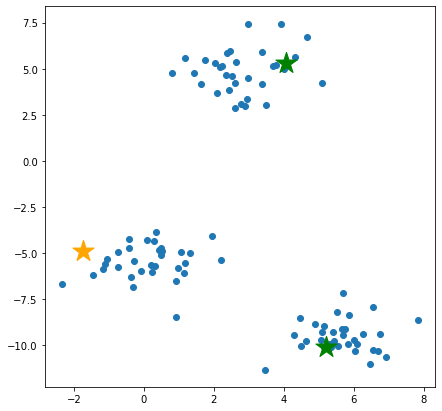

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(centroids[1, 0], centroids[1, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

### Функция для обучения KMeans с инициализацией KMeans++

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

Сделаем задачу посложнее

In [ ]:
X, y = make_blobs(n_samples=300, random_state=13, cluster_std=1.5)

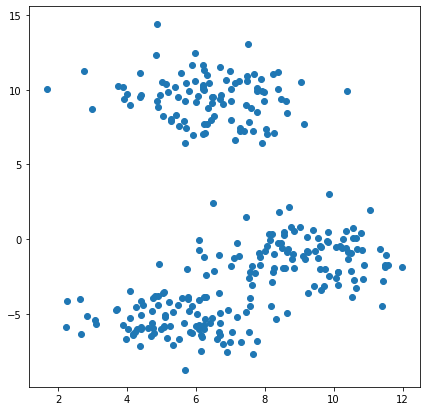

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
centroids, clusters = KMeans(X)

stopping at iter 3


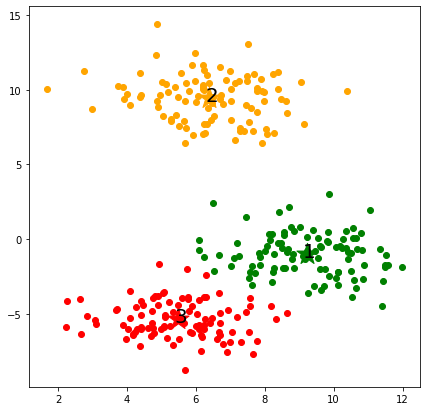

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

Сравним кластера с настоящими метками классов

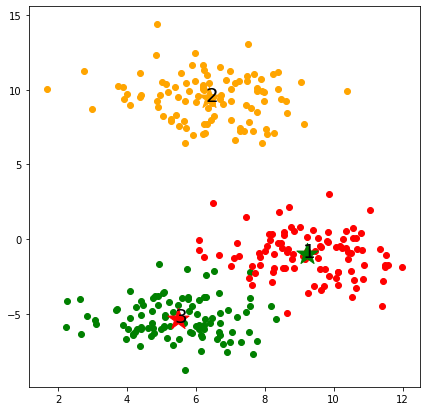

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(k):
    temp = X[y == i]
    plt.scatter(temp[:,0], temp[:,1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);